In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
%matplotlib inline

# Carregar os dados de exemplo
data = pd.read_excel('dados_filtrados.xlsx')
data

,Situação,Valor de M.,LPA,VPA,P/L,EV/EBITDA,Dividend Yield,Margem Bruta,Margem EBITDA,Margem Liquida,ROE,ROA,Div Liquida/EBITDA,Liq. Corrente
0,ruim,1.334627e+09,0.57,36.03,24.71,NaN,0.85,NaN,NaN,0.0648,20.66,NaN,NaN,1.02
1,boa,1.519060e+10,0.18,0.80,14.92,NaN,15.27,87.95,61.43,34.6900,37.00,20.0,2.03,0.94
2,ruim,9.465319e+07,0.16,2.07,31.55,NaN,2.98,NaN,NaN,38.1500,25.00,NaN,NaN,1.50
3,ruim,2.819886e+08,0.21,1.23,21.69,NaN,4.25,NaN,NaN,56.0000,22.00,NaN,NaN,10.57
4,ruim,2.887665e+08,0.60,10.42,5.65,NaN,NaN,NaN,NaN,157.4500,6.00,NaN,NaN,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,boa,1.815159e+07,-34.50,-59.76,-0.20,NaN,NaN,NaN,NaN,-0.9000,NaN,NaN,NaN,0.29
372,ruim,5.034333e+09,0.21,1.69,15.64,9.4,NaN,661.00,-5.75,6.1800,24.00,5.0,NaN,1.19
373,boa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3600,11.00,NaN,NaN,1.90
374,ruim,1.412889e+08,-0.52,11.61,-7.35,NaN,2.00,NaN,NaN,2.2100,5.00,NaN,NaN,3.03


In [21]:
data.isnull().sum()/len(data) * 100

Situação               0.000000
Valor de M.           15.159574
LPA                   10.638298
VPA                    9.840426
P/L                   15.957447
EV/EBITDA             64.893617
Dividend Yield        62.500000
Margem Bruta          63.563830
Margem EBITDA         63.297872
Margem Liquida        15.425532
ROE                   12.765957
ROA                   58.776596
Div Liquida/EBITDA    68.351064
Liq. Corrente         15.691489
dtype: float64

In [22]:
for column in data.columns:
    # Calcular a moda da coluna
    mode_value = data[column].mode()[0]
    # Substituir os valores NaN pela moda da coluna
    data[column].fillna(mode_value, inplace=True)


columns = data.columns
y = data['Situação']
x = data.drop('Situação', axis=1)  # ajuste o nome da coluna de rótulos corretamente


for column in data.columns:
    # Calcular a moda da coluna
    mode_value = data[column].mode()[0]
    print(column, mode_value)
    
    # Substituir os valores NaN pela moda da coluna
    data[column].fillna(mode_value, inplace=True)

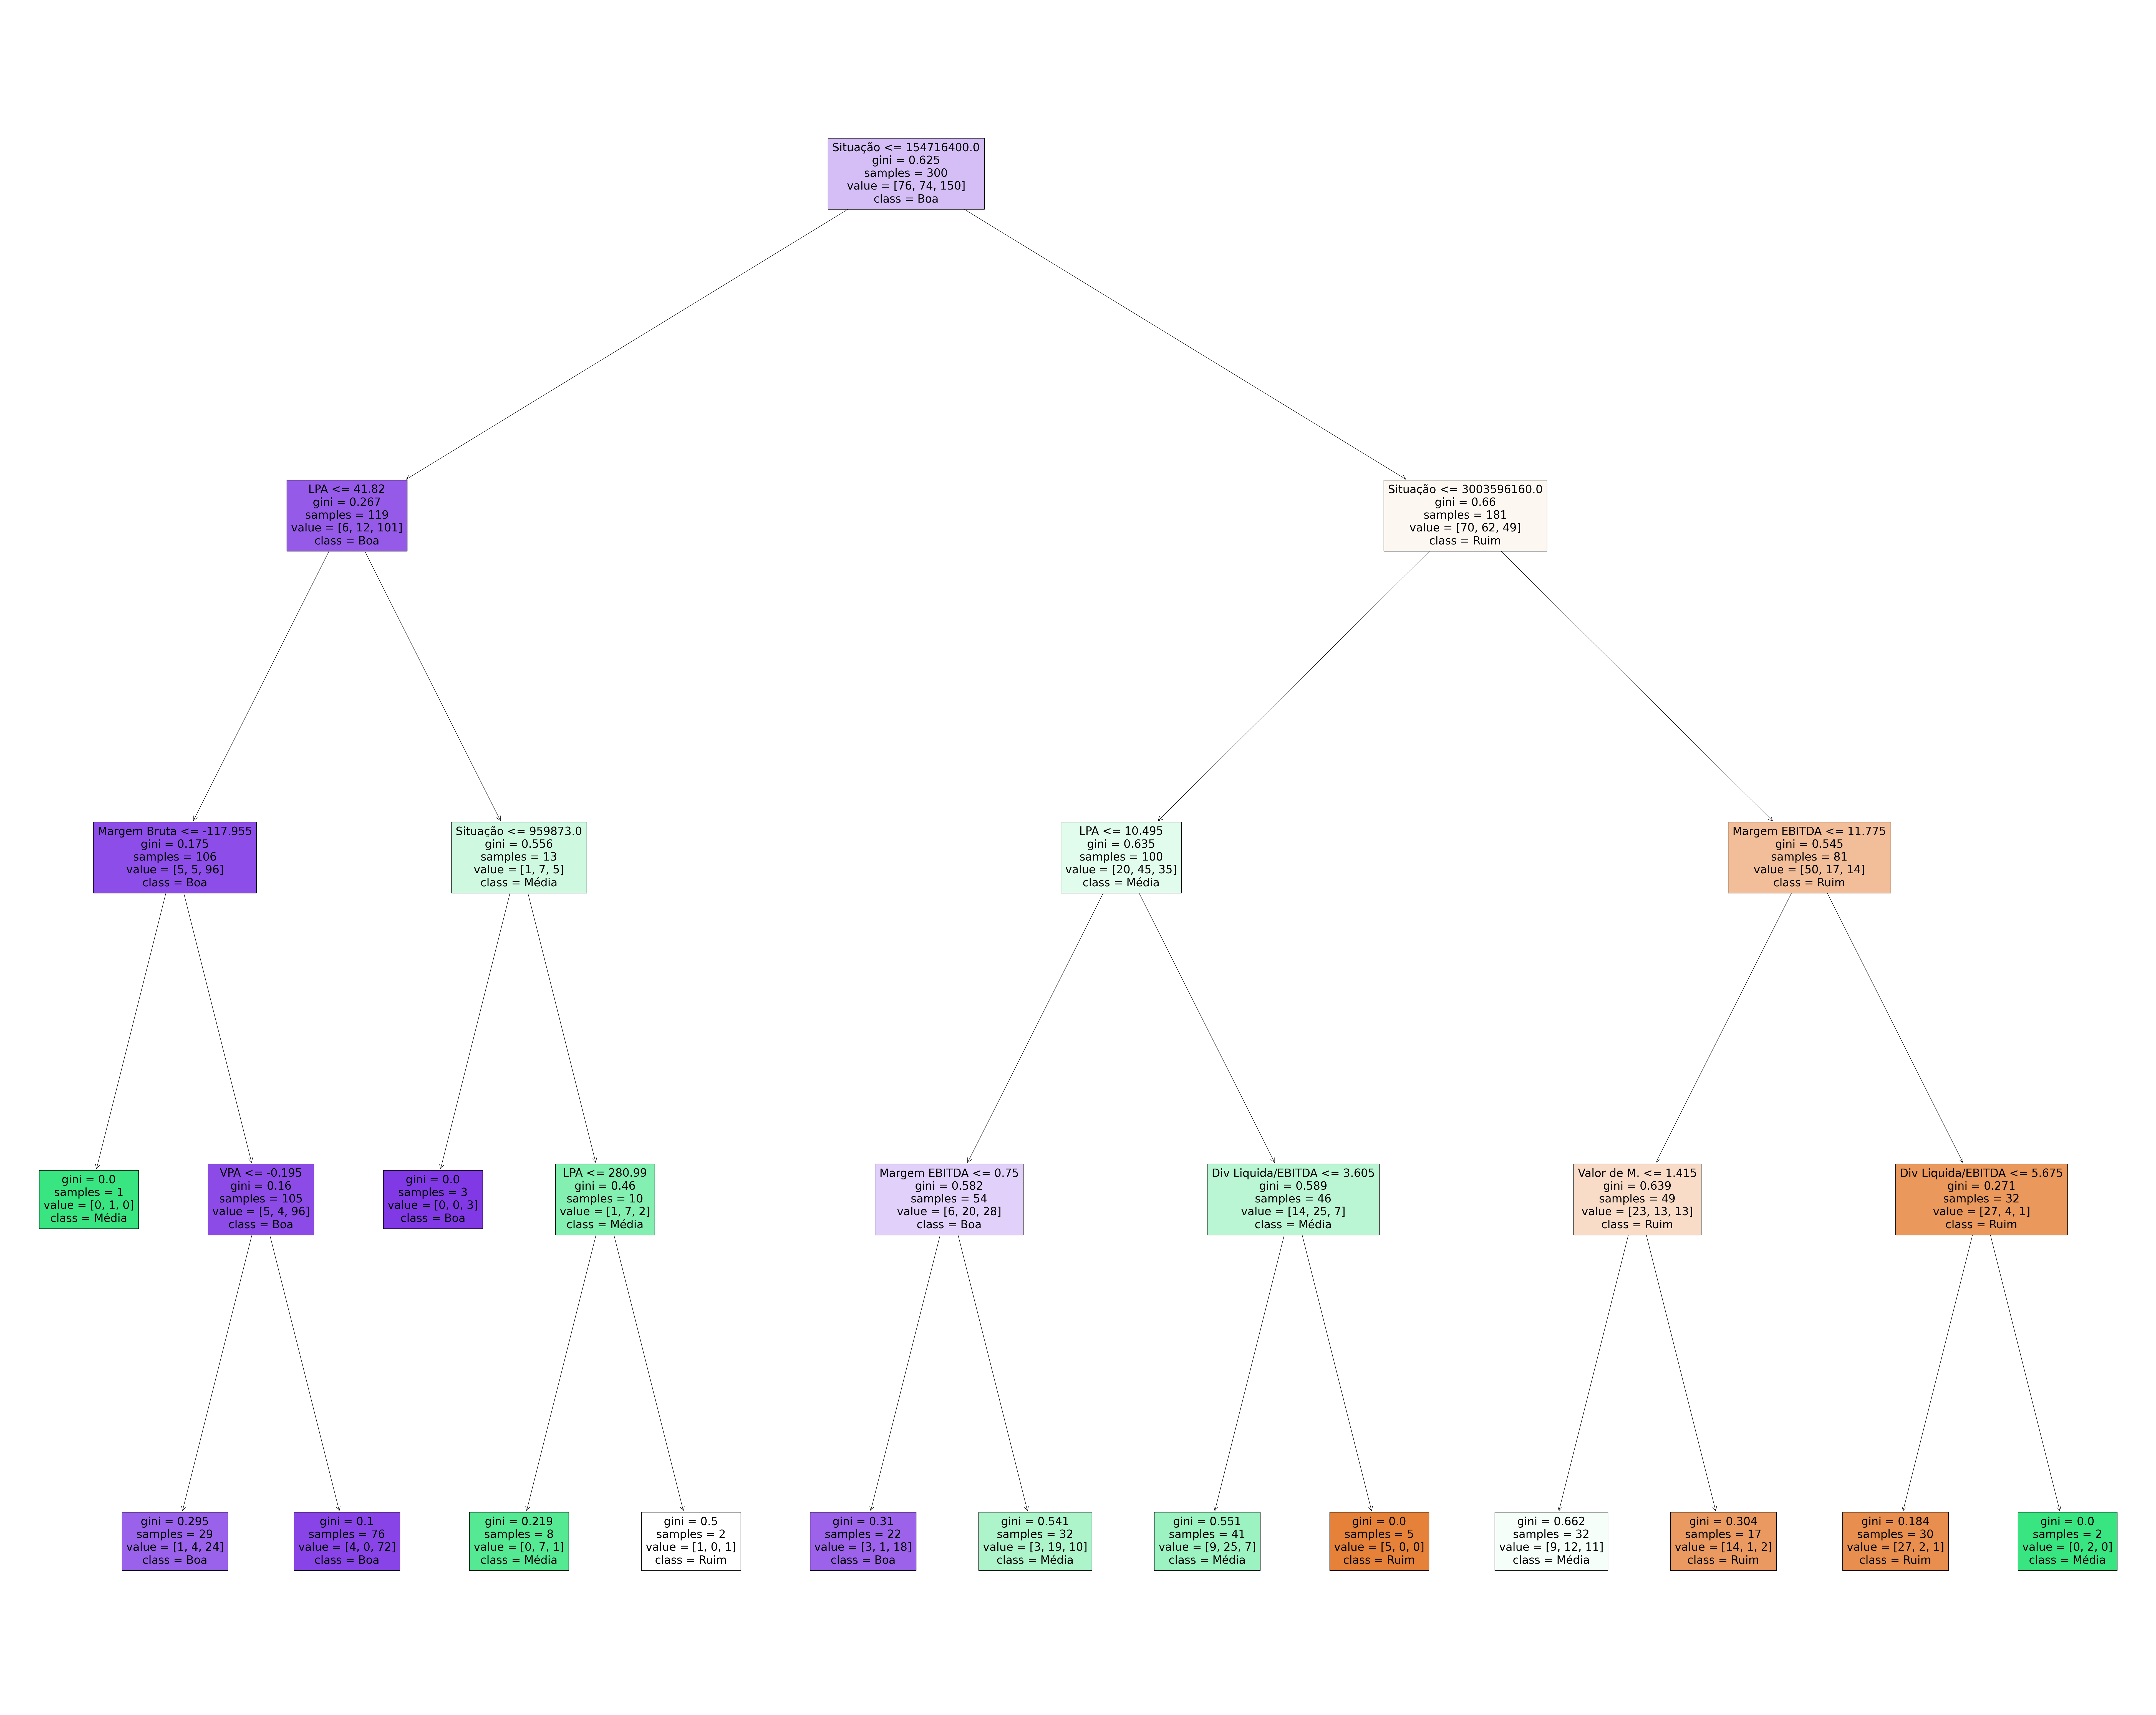

'Source.gv.pdf'

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y = data['Situação']
x = data.drop('Situação', axis=1)  # ajuste o nome da coluna de rótulos corretamente

#Criando temp para armazenar os valores sem null
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Criar o classificador da árvore de decisão
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

#Plotar a árvore de decisão
plt.figure(figsize=(100, 80))
plot_tree(clf, feature_names = data.columns, class_names=['Ruim', 'Média', 'Boa'], filled=True)
plt.show()

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=x.columns, class_names=['Ruim', 'Média', 'Boa'])
graph = graphviz.Source(dot_data)
graph.view()  # Abrir a árvore em uma visualização interativa (exibe em um visualizador externo)


Anaalise preditiva

In [30]:
# Fazer previsões nos dados de teste
y_pred = clf.predict(X_test)

# Avaliar a precisão do classificador
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracy)

#y_pred, y_test

Acurácia: 0.5394736842105263
